# Import Required Libraries

In [44]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [45]:
#Lloguers#####################################################################################################
#Merge the data

# Load Data
file1_path = './portal_dades_bcn_ajuntament/bcn_lloguer_preuperm2_2014_2024.csv'
file2_path = './portal_dades_bcn_ajuntament/bcn_lloguer_preutotal_2014_2024.csv'
price_per_m2_df = pd.read_csv(file1_path)
total_rent_price_df = pd.read_csv(file2_path)
# Reshape Data from Wide to Long Format
price_per_m2_df = price_per_m2_df.melt(id_vars=['Territori', 'Tipus de territori'], var_name='year', value_name='price_per_m2')
total_rent_price_df = total_rent_price_df.melt(id_vars=['Territori', 'Tipus de territori'], var_name='year', value_name='total_rent_price')
# Convert 'year' column to integer
price_per_m2_df['year'] = price_per_m2_df['year'].astype(int)
total_rent_price_df['year'] = total_rent_price_df['year'].astype(int)
# Filter Data to Remove Rows from 2013 (included) until 2000
price_per_m2_df = price_per_m2_df[price_per_m2_df['year'] > 2013]
total_rent_price_df = total_rent_price_df[total_rent_price_df['year'] > 2013]
# Merge DataFrames
lloguer_df = pd.merge(price_per_m2_df, total_rent_price_df, on=['Territori', 'Tipus de territori', 'year'], suffixes=('_per_m2', '_total'))
# Display the first few rows of the merged DataFrame to inspect the result
print(lloguer_df.head())
# Save Merged Data
lloguer_df.to_csv('./portal_dades_bcn_ajuntament/merged_rent_prices_2014_2024.csv', index=False)

        Territori Tipus de territori  year price_per_m2 total_rent_price
0       Barcelona           Municipi  2014        10.16           688.23
1    Ciutat Vella          Districte  2014        11.38           639.11
2        el Raval              Barri  2014        10.47           577.85
3  el Barri Gòtic              Barri  2014        10.54           749.99
4  la Barceloneta              Barri  2014        15.15           563.08


In [46]:
#Compraventa#####################################################################################################
#Merge the data
# Load Data
file1_path = './portal_dades_bcn_ajuntament/bcn_preutotal_2014_2024.csv'
file2_path = './portal_dades_bcn_ajuntament/bcn_preuperm2_2014_2024.csv'
price_per_m2_df = pd.read_csv(file1_path)
total_sale_price_df = pd.read_csv(file2_path)
# Reshape Data from Wide to Long Format
price_per_m2_df = price_per_m2_df.melt(id_vars=['Territori', 'Tipus de territori'], var_name='year', value_name='total_sale_price')
total_sale_price_df = total_sale_price_df.melt(id_vars=['Territori', 'Tipus de territori'], var_name='year', value_name='price_per_m2')
# Convert 'year' column to integer
price_per_m2_df['year'] = price_per_m2_df['year'].astype(int)
total_sale_price_df['year'] = total_sale_price_df['year'].astype(int)
# Filter Data to Remove Rows from 2013 (included) until 2000
price_per_m2_df = price_per_m2_df[price_per_m2_df['year'] > 2013]
total_sale_price_df = total_sale_price_df[total_sale_price_df['year'] > 2013]
# Merge DataFrames
compraventa = pd.merge(price_per_m2_df, total_sale_price_df, on=['Territori', 'Tipus de territori', 'year'], suffixes=('_total', '_per_m2'))
# Display the first few rows of the merged DataFrame to inspect the result
print(compraventa.head())
# Save Merged Data
compraventa.to_csv('./portal_dades_bcn_ajuntament/merged_sale_prices_2014_2024.csv', index=False)

        Territori Tipus de territori  year total_sale_price price_per_m2
0       Barcelona           Municipi  2014        212220.89      2304.15
1    Ciutat Vella          Districte  2014        162392.35      2383.56
2        el Raval              Barri  2014        111197.24      1807.06
3  el Barri Gòtic              Barri  2014        262301.47      2715.61
4  la Barceloneta              Barri  2014        135337.22      3130.85


# Inspect Data

In [47]:
# Filter data where Tipus de territori is 'Districte'
lloguer_district_df = lloguer_df[lloguer_df['Tipus de territori'] == 'Districte']
compraventa_district_df = compraventa[compraventa['Tipus de territori'] == 'Districte']
# Function to plot evolution of prices
def plot_evolution(df, price_column, title):
    districts = df['Territori'].unique()
    plt.figure(figsize=(10, 5))
    for district in districts:
        district_df = df[df['Territori'] == district]
        plt.plot(district_df['year'], district_df[price_column], label=district)
    plt.xlabel('Year')
    plt.ylabel(price_column)
    plt.title(title)
    plt.legend()
    plt.show()

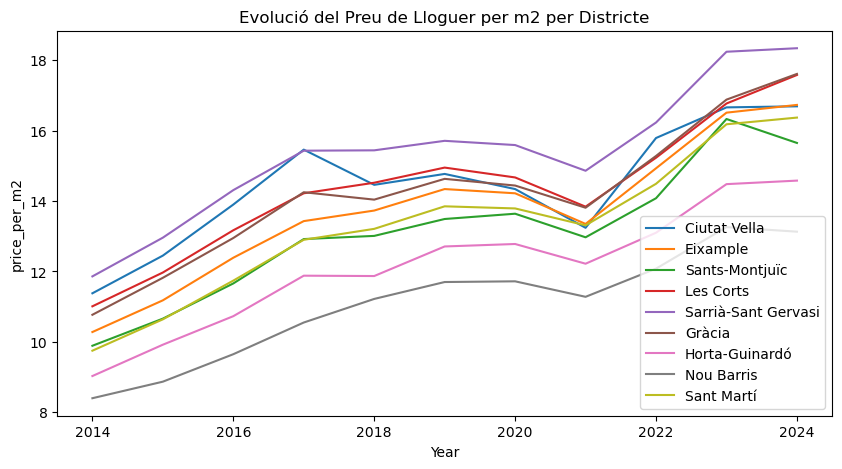

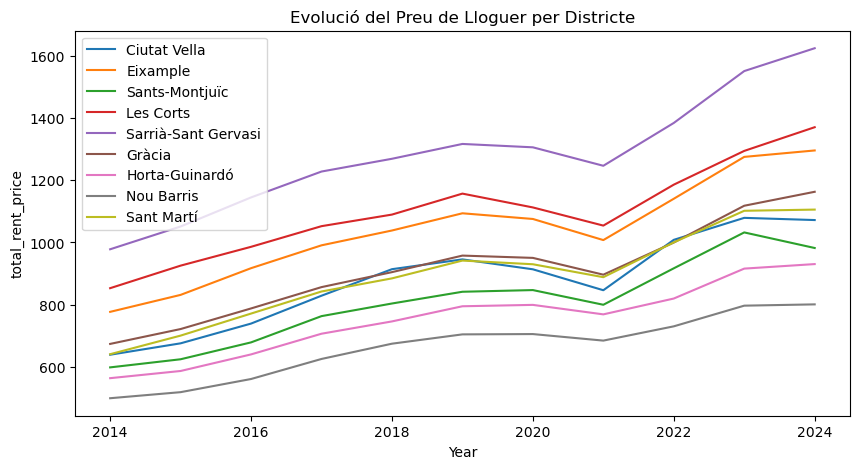

In [48]:
#Plots preus de lloguer////////////////////////////////////////////////////////////////////////////////////////////////////////
plot_evolution(lloguer_district_df, 'price_per_m2', 'Evolució del Preu de Lloguer per m2 per Districte')
plot_evolution(lloguer_district_df, 'total_rent_price', 'Evolució del Preu de Lloguer per Districte')

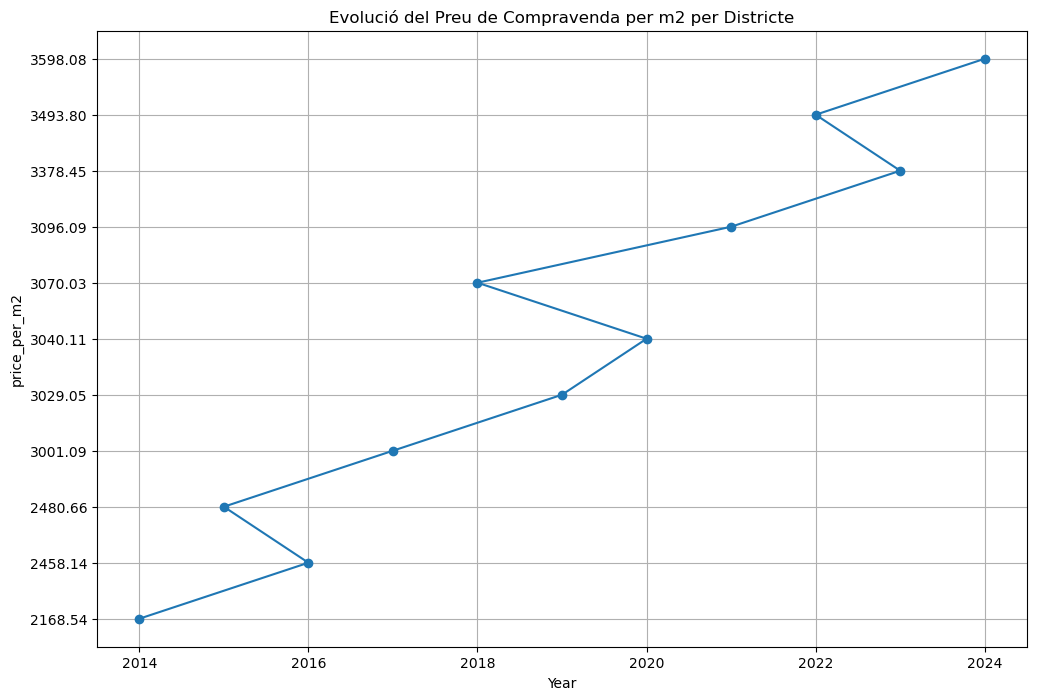

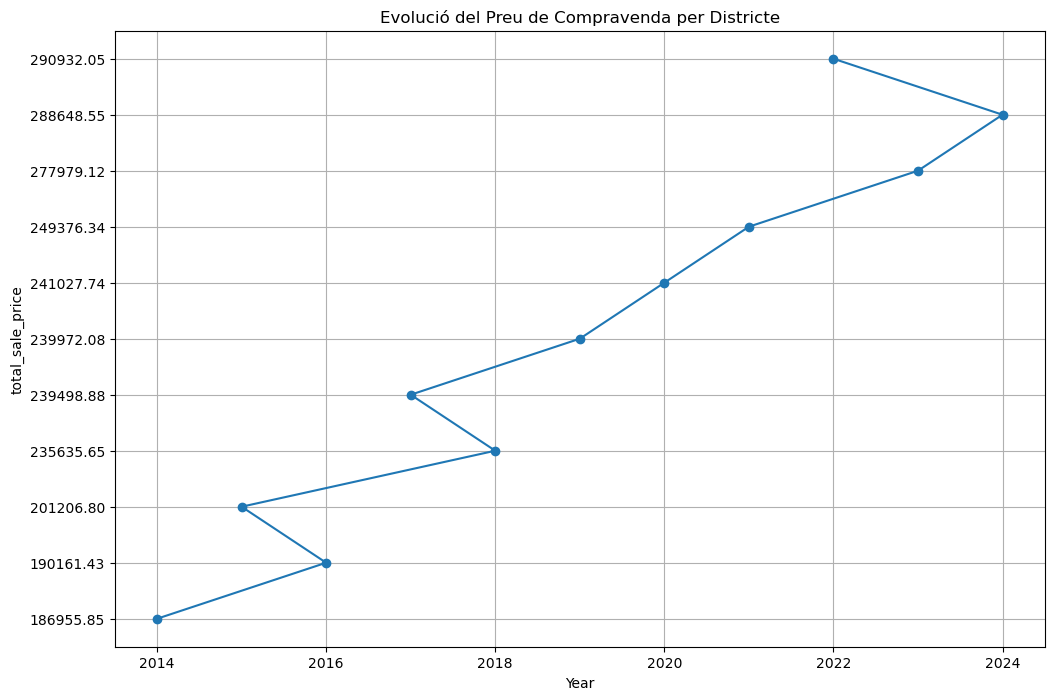

In [49]:

# Function to plot evolution of prices with fixed y-axis limits
def plot_evolution_line(df, price_column, title):
    districts = df['Territori'].unique()
    plt.figure(figsize=(12, 8))
    for district in districts:
        #district_df should be sorted for all districts
        district_df = df[df['Territori'] == district].sort_values(by=price_column)
    plt.xlabel('Year')
    plt.ylabel(price_column)
    plt.title(title)
    #plt.legend()
    plt.grid(True)
    plt.plot(district_df['year'], district_df[price_column], label=district, marker='o')
    plt.show()

# Plot the data with fixed y-axis limits
plot_evolution_line(compraventa_district_df, 'price_per_m2', 'Evolució del Preu de Compravenda per m2 per Districte')
plot_evolution_line(compraventa_district_df, 'total_sale_price', 'Evolució del Preu de Compravenda per Districte')

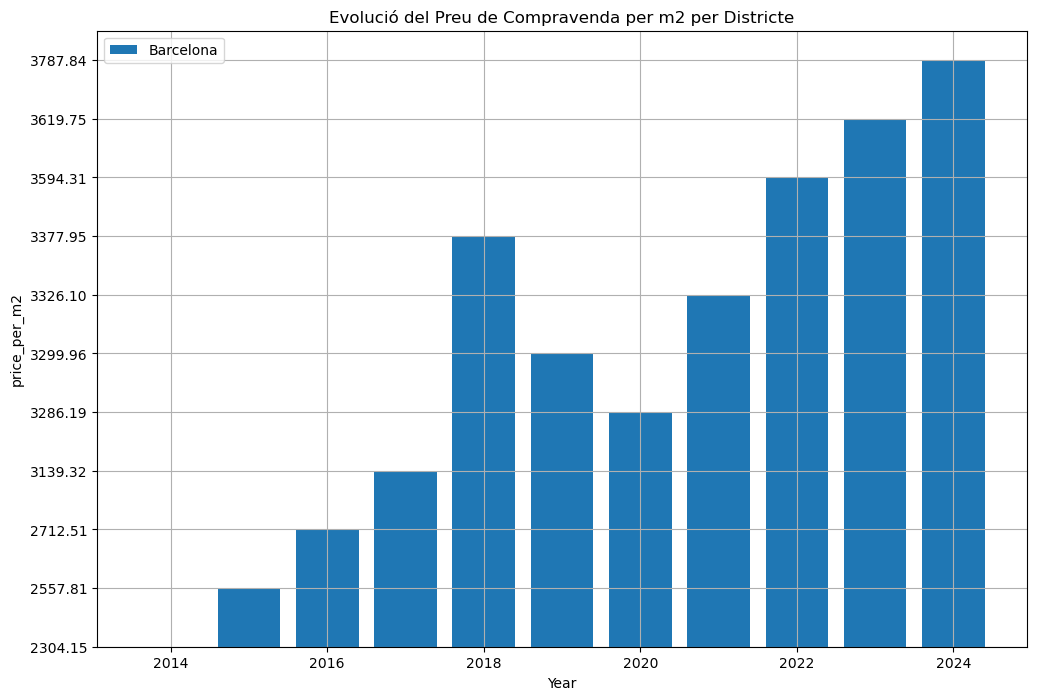

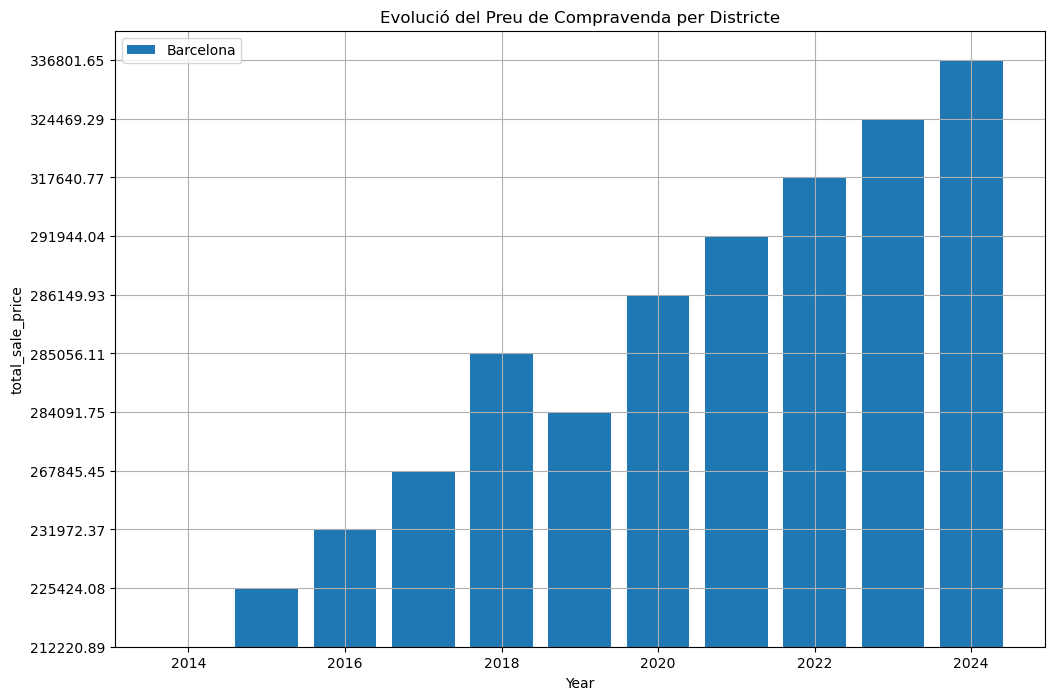

In [50]:

# Function to plot evolution of prices with fixed y-axis limits
def plot_evolution_line(df, price_column, title):
    districts = df['Territori'].unique()
    plt.figure(figsize=(12, 8))
    for district in districts:
        district_df = df[df['Territori'] == district].sort_values(by=price_column)
        plt.bar(district_df['year'], district_df[price_column], label=district)
    plt.xlabel('Year')
    plt.ylabel(price_column)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


# Filter data for the 5 most expensive districts
#compraventa_district_df = compraventa[compraventa['Territori'].isin(['Sarrià-Sant Gervasi', 'Les Corts', 'Eixample', 'Ciutat Vella', 'Sant Martí'])]
compraventa_district_df = compraventa[compraventa['Territori'] == 'Barcelona']

# Plot the data with fixed y-axis limits
plot_evolution_line(compraventa_district_df, 'price_per_m2', 'Evolució del Preu de Compravenda per m2 per Districte')
plot_evolution_line(compraventa_district_df, 'total_sale_price', 'Evolució del Preu de Compravenda per Districte')

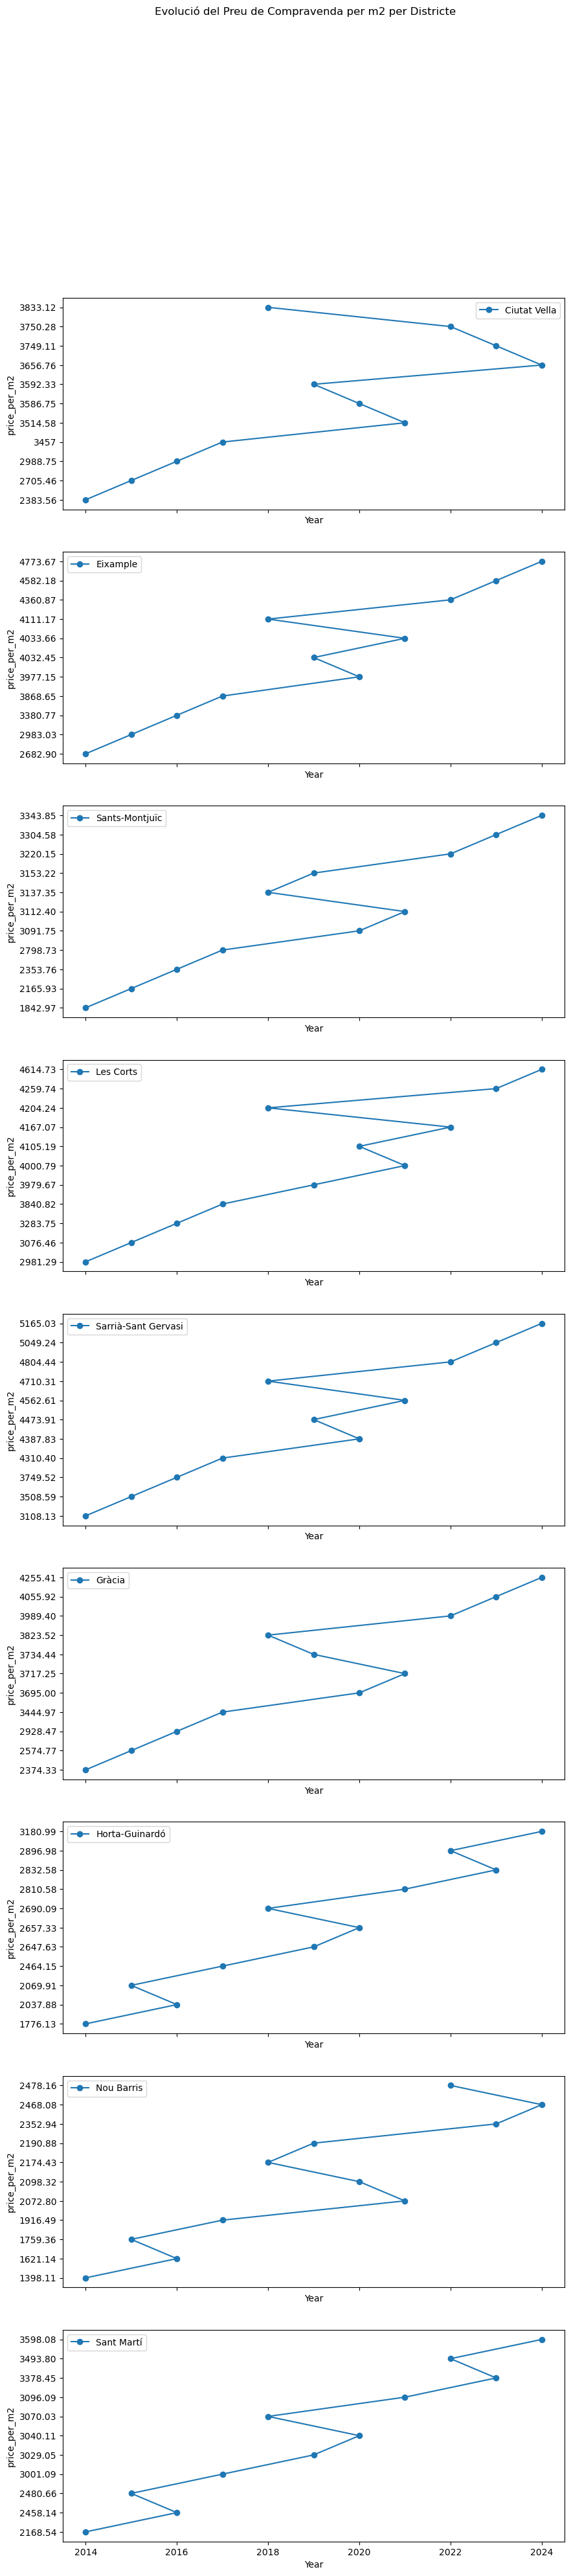

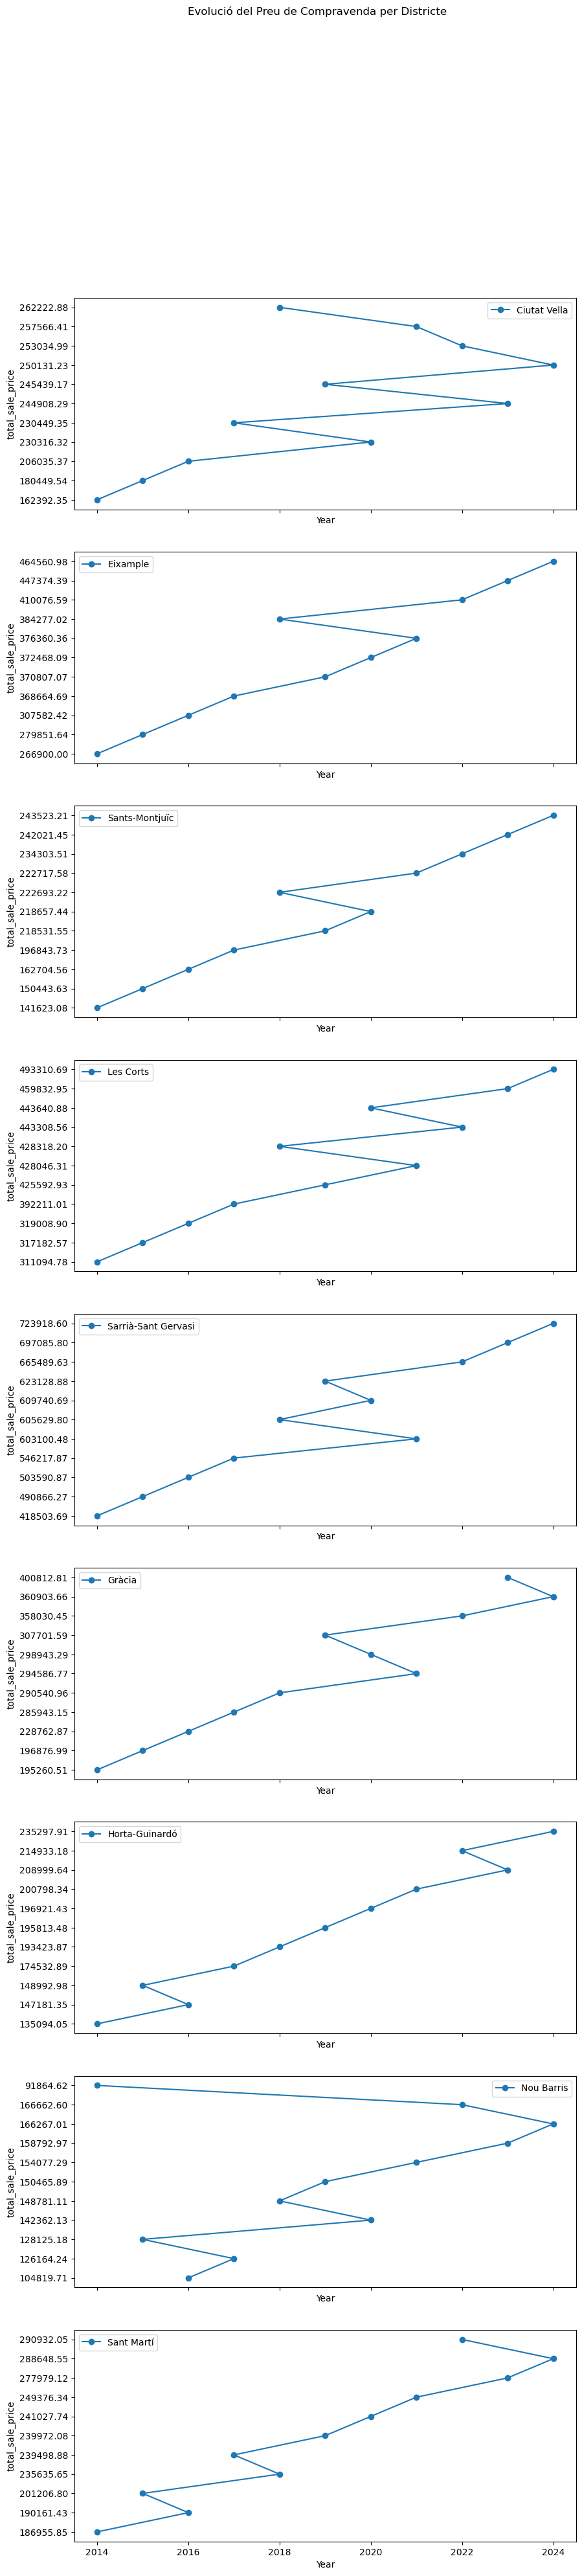

In [52]:
def plot_evolution_line_separate(df, price_column, title):
    districts = df['Territori'].unique()
    fig, axes = plt.subplots(len(districts), 1, figsize=(10, 5 * len(districts)), sharex=True)
    fig.suptitle(title)
    for ax, district in zip(axes, districts):
        district_df = df[df['Territori'] == district].sort_values(by=price_column)
        #print(f"Plotting for district: {district}")
        #print(district_df[['year', price_column]])
        ax.plot(district_df['year'], district_df[price_column], label=district, marker='o')
        ax.set_ylabel(price_column)
        ax.set_xlabel('Year')
        ax.legend()
    plt.xlabel('Year')
    plt.show()


compraventa_district_df = compraventa[compraventa['Tipus de territori'] == 'Districte']

# Plot the data with fixed y-axis limits in separate subplots
plot_evolution_line_separate(compraventa_district_df, 'price_per_m2', 'Evolució del Preu de Compravenda per m2 per Districte')
plot_evolution_line_separate(compraventa_district_df, 'total_sale_price', 'Evolució del Preu de Compravenda per Districte')